## Importing Required Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [130]:
df = pd.read_csv("./Final Dataset for analysis (2).csv", parse_dates=["InvoiceDate"])
df

,Churn,Country,CustomerID,InvoiceDate,Quantity,UnitPrice
0,No,United Kingdom,13047.0,2010-12-01,6.0,2.55
1,No,United Kingdom,12583.0,2010-12-01,6.0,3.39
2,No,United Kingdom,13748.0,2010-12-01,8.0,2.75
3,No,United Kingdom,15291.0,2010-12-01,6.0,3.39
4,No,United Kingdom,14688.0,2010-12-01,6.0,3.39
...,...,...,...,...,...,...
132561,Yes,United Kingdom,15544.0,2011-05-12,8.0,1.95
132562,Yes,United Kingdom,15544.0,2011-05-12,10.0,1.65
132563,Yes,United Kingdom,15544.0,2011-05-12,16.0,0.42
132564,Yes,United Kingdom,15544.0,2011-05-12,8.0,1.25


In [7]:
df.head()

,Churn,Country,CustomerID,InvoiceDate,Quantity,UnitPrice
0,No,United Kingdom,13047.0,2010-12-01,6.0,2.55
1,No,United Kingdom,12583.0,2010-12-01,6.0,3.39
2,No,United Kingdom,13748.0,2010-12-01,8.0,2.75
3,No,United Kingdom,15291.0,2010-12-01,6.0,3.39
4,No,United Kingdom,14688.0,2010-12-01,6.0,3.39


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132566 entries, 0 to 132565
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Churn        132566 non-null  object        
 1   Country      132035 non-null  object        
 2   CustomerID   132566 non-null  float64       
 3   InvoiceDate  132035 non-null  datetime64[ns]
 4   Quantity     132034 non-null  float64       
 5   UnitPrice    132034 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 6.1+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,132566.0,15264.090966,1723.934590,12346.0,13815.00,15128.00,16788.00,18287.00
Quantity,132034.0,12.156376,293.996300,-74215.0,2.00,5.00,12.00,74215.00
UnitPrice,132034.0,3.604263,42.284235,0.0,1.25,1.95,3.75,8142.75


In [10]:
df.isna().sum()

Churn            0
Country        531
CustomerID       0
InvoiceDate    531
Quantity       532
UnitPrice      532
dtype: int64

In [11]:
df = df.dropna()
df.isna().sum()

Churn          0
Country        0
CustomerID     0
InvoiceDate    0
Quantity       0
UnitPrice      0
dtype: int64

In [12]:
print(df.shape)

(132034, 6)


In [134]:
df['Year'] = df.InvoiceDate.dt.year

In [135]:
df['Month'] = df.InvoiceDate.dt.month

In [136]:
df['Date'] = df.InvoiceDate.dt.day

In [137]:
df['Day of Year'] = df.InvoiceDate.dt.dayofyear

In [138]:
df

,Churn,Country,CustomerID,InvoiceDate,Quantity,UnitPrice,Year,Month,Date,Day of Year
0,No,United Kingdom,13047.0,2010-12-01,6.0,2.55,2010.0,12.0,1.0,335.0
1,No,United Kingdom,12583.0,2010-12-01,6.0,3.39,2010.0,12.0,1.0,335.0
2,No,United Kingdom,13748.0,2010-12-01,8.0,2.75,2010.0,12.0,1.0,335.0
3,No,United Kingdom,15291.0,2010-12-01,6.0,3.39,2010.0,12.0,1.0,335.0
4,No,United Kingdom,14688.0,2010-12-01,6.0,3.39,2010.0,12.0,1.0,335.0
...,...,...,...,...,...,...,...,...,...,...
132561,Yes,United Kingdom,15544.0,2011-05-12,8.0,1.95,2011.0,5.0,12.0,132.0
132562,Yes,United Kingdom,15544.0,2011-05-12,10.0,1.65,2011.0,5.0,12.0,132.0
132563,Yes,United Kingdom,15544.0,2011-05-12,16.0,0.42,2011.0,5.0,12.0,132.0
132564,Yes,United Kingdom,15544.0,2011-05-12,8.0,1.25,2011.0,5.0,12.0,132.0


In [140]:
df["Churn"].value_counts()

Yes    130582
No       1984
Name: Churn, dtype: int64

In [141]:
df.drop("InvoiceDate", axis = 1, inplace = True)

In [142]:
df.drop("CustomerID", axis = 1, inplace = True)

In [144]:
df['Churn']=df['Churn'].map({'No':0,'Yes':1})

In [145]:
df['Country'].nunique()

35

In [153]:
df2= df.copy()

#### One hot encoding

In [24]:
df=pd.get_dummies(df,drop_first=True)

In [25]:
df.head()

,Churn,Quantity,UnitPrice,Year,Month,Date,Day of Year,Country_Austria,Country_Bahrain,Country_Belgium,...,Country_Portugal,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,0,6.0,2.55,2010,12,1,335,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,6.0,3.39,2010,12,1,335,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,8.0,2.75,2010,12,1,335,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,6.0,3.39,2010,12,1,335,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,6.0,3.39,2010,12,1,335,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Data Visualization

In [147]:
df2= df.copy()

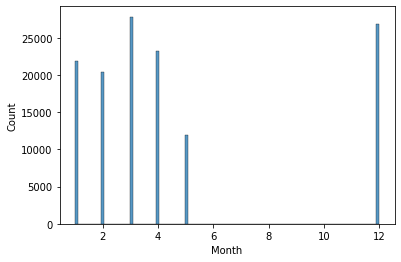

In [154]:
sns.histplot(x='Month',data=df2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


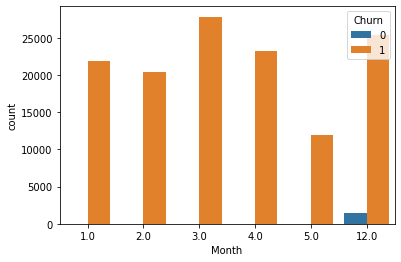

In [157]:
sns.countplot('Month',data=df2,hue='Churn')

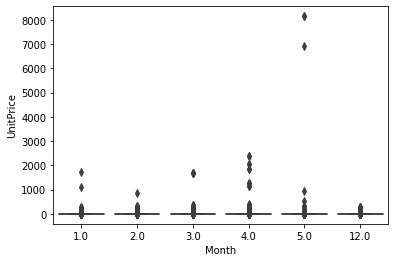

In [160]:
sns.boxplot(x='Month',y='UnitPrice',data=df2)

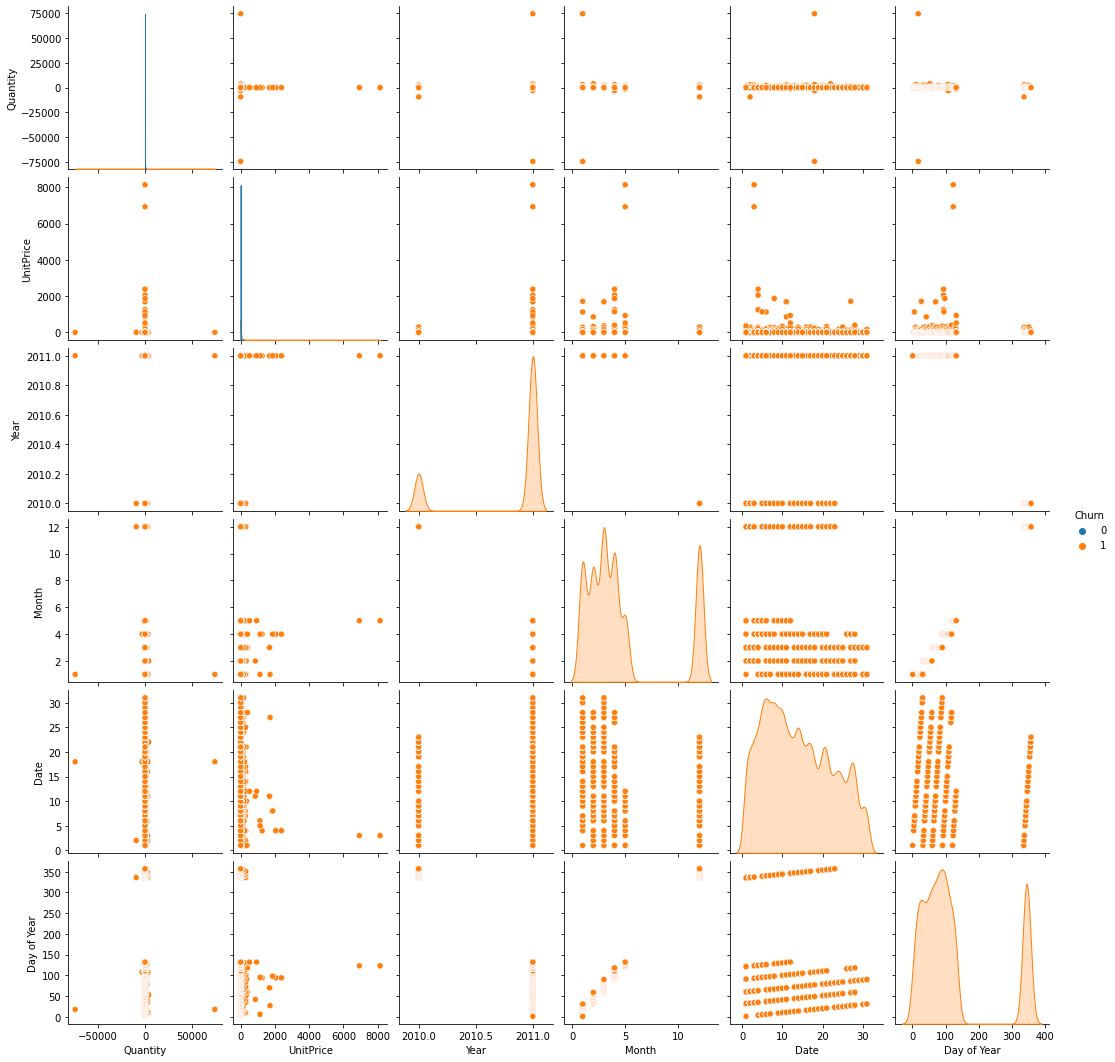

In [161]:
sns.pairplot(df,hue='Churn')

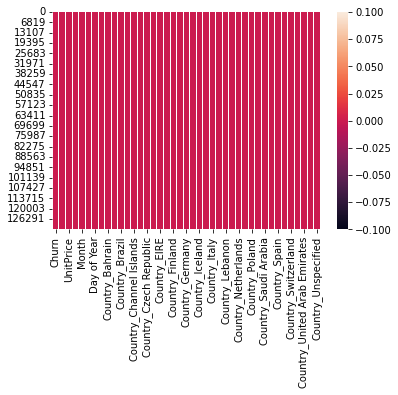

In [28]:
sns.heatmap(df.isnull())
plt.show()

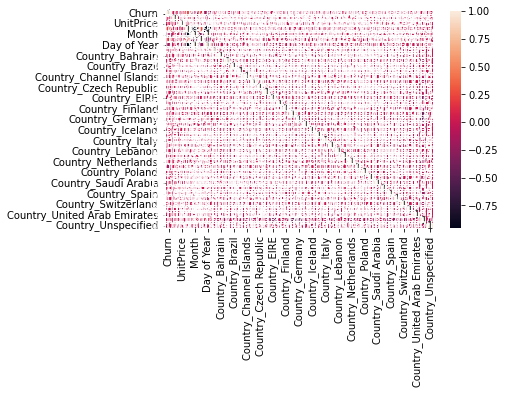

In [29]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [30]:
Target_count= df.Churn.value_counts()

print('Class:0 =',Target_count[0])
print('Class:1 =',Target_count[1])
print('Proportion of class 0 is ', round(Target_count[0] * 100 / (Target_count[1] + Target_count[0]), 2),'%')

Class:0 = 1453
Class:1 = 130581
Proportion of class 0 is  1.1 %


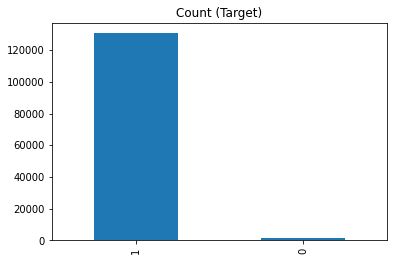

In [31]:
Target_count.plot(kind='bar', title='Count (Target)')
plt.show()

In [32]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [33]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(X, y) #resampling the data 

In [34]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler() #Initialis the model 
X_ros, y_ros = ros.fit_resample(X, y) #Fit the model

In [35]:
len(X),len(X_ros),len(X_rus)

(132034, 261162, 2906)

In [36]:
len(y),len(y_ros),len(y_rus)

(132034, 261162, 2906)

In [37]:
Target_count= y_rus.value_counts()

print('Class:0 =',Target_count[0])
print('Class:1 =',Target_count[1])

Class:0 = 1453
Class:1 = 1453


In [38]:
Target_count= y_ros.value_counts()

print('Class:0 =',Target_count[0])
print('Class:1 =',Target_count[1])

Class:0 = 130581
Class:1 = 130581


## Train and Test Data

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
from sklearn.metrics import accuracy_score

### Random Forest Classifier

#### Training Data & Prediction

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc= RandomForestClassifier()

In [43]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
rfc.feature_importances_

array([5.05884694e-02, 6.21051536e-02, 6.02058326e-02, 4.77062653e-02,
       4.05562212e-01, 3.58686902e-01, 1.96860297e-05, 0.00000000e+00,
       6.35463635e-05, 0.00000000e+00, 0.00000000e+00, 1.07231576e-06,
       2.43015265e-05, 7.37127411e-06, 2.03267935e-06, 4.59342508e-04,
       0.00000000e+00, 4.07552777e-04, 5.46142221e-04, 6.12103869e-04,
       0.00000000e+00, 2.45491826e-06, 2.87679265e-07, 7.42070725e-06,
       1.24840576e-05, 0.00000000e+00, 2.44406708e-06, 1.31912969e-04,
       8.78604108e-03, 1.51450849e-07, 3.33818988e-05, 0.00000000e+00,
       9.30501124e-08, 3.49007899e-05, 2.06593668e-05, 1.20555074e-05,
       0.00000000e+00, 0.00000000e+00, 3.95772593e-03, 0.00000000e+00])

In [45]:
a=df.columns

In [46]:
P1=rfc.predict(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [48]:
print(classification_report(y_test,P1))
print('\n')
print(confusion_matrix(y_test, P1))
print('\n')
print(accuracy_score(y_test, P1))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       300
           1       1.00      1.00      1.00     26107

    accuracy                           1.00     26407
   macro avg       0.88      0.94      0.91     26407
weighted avg       1.00      1.00      1.00     26407



[[  266    34]
 [   88 26019]]


0.9953800128753739


#### Predictions and Evaluations From Top feature

In [49]:
from sklearn.feature_selection import RFE

In [50]:
M1=RFE(rfc,n_features_to_select=4)

In [51]:
M1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=4)

In [52]:
prediction=M1.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [54]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       300
           1       1.00      1.00      1.00     26107

    accuracy                           1.00     26407
   macro avg       0.86      1.00      0.92     26407
weighted avg       1.00      1.00      1.00     26407



In [55]:
confusion_matrix(y_test, prediction)

array([[  300,     0],
       [  112, 25995]])

In [56]:
accuracy_score(y_test, prediction)

0.9957587003446056

#### Next Model Using Feature No different

In [57]:
M2=RFE(rfc,n_features_to_select=5)

In [58]:
M2.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [59]:
P2=M2.predict(X_test)

In [60]:
print(classification_report(y_test,P2))
print('\n')
print(confusion_matrix(y_test, P2))
print('\n')
print(accuracy_score(y_test, P2))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       300
           1       1.00      1.00      1.00     26107

    accuracy                           1.00     26407
   macro avg       0.87      0.99      0.92     26407
weighted avg       1.00      1.00      1.00     26407



[[  296     4]
 [  109 25998]]


0.9957208315976824


## Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
tr = DecisionTreeClassifier()

In [63]:
tr.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
Pre1=tr.predict(X_test)

In [65]:
print(classification_report(y_test,Pre1))
print('\n')
print(confusion_matrix(y_test, Pre1))
print('\n')
print(accuracy_score(y_test, Pre1))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       300
           1       1.00      1.00      1.00     26107

    accuracy                           1.00     26407
   macro avg       0.87      0.94      0.90     26407
weighted avg       1.00      1.00      1.00     26407



[[  263    37]
 [   90 26017]]


0.9951906691407582


In [66]:
M3 = RFE(tr,n_features_to_select=6)

In [67]:
M3.fit(X_train,y_train)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)

In [68]:
Pre2=M3.predict(X_test)

In [69]:
print(classification_report(y_test,Pre2))
print('\n')
print(confusion_matrix(y_test, Pre2))
print('\n')
print(accuracy_score(y_test, Pre2))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       300
           1       1.00      1.00      1.00     26107

    accuracy                           1.00     26407
   macro avg       0.87      0.94      0.90     26407
weighted avg       1.00      1.00      1.00     26407



[[  264    36]
 [   90 26017]]


0.9952285378876813


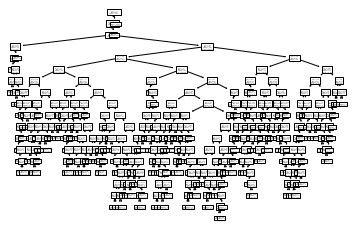

In [70]:
from sklearn import tree

tree.plot_tree(tr)

plt.show()

## SVM

In [71]:
from sklearn.svm import SVC

In [72]:
vm = SVC()

In [73]:
vm.fit(X_train,y_train)

SVC()

In [74]:
P3=vm.predict(X_test)

In [75]:
print(classification_report(y_test,P3))
print('\n')
print(confusion_matrix(y_test, P3))
print('\n')
print(accuracy_score(y_test, P3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.99      1.00      0.99     26107

    accuracy                           0.99     26407
   macro avg       0.49      0.50      0.50     26407
weighted avg       0.98      0.99      0.98     26407



[[    0   300]
 [    0 26107]]


0.9886393759230507


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gridsearch

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
#param_grid = {'C': [0.1,1, 10, 100, 1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 

In [78]:
#gr=GridSearchCV(SVC(),param_grid)

In [79]:
#gr.fit(X_train,y_train)

In [80]:
#gr.best_estimator_

In [81]:
#gr.best_params_

In [82]:
#P4=gr.predict(X_test)

In [83]:
'''print(classification_report(y_test,P4))
print('\n')
print(confusion_matrix(y_test, P4))
print('\n')
print(accuracy_score(y_test, P4))'''

"print(classification_report(y_test,P4))\nprint('\n')\nprint(confusion_matrix(y_test, P4))\nprint('\n')\nprint(accuracy_score(y_test, P4))"

## Naive Bayes classifier

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
NB = GaussianNB()

In [86]:
NB.fit(X_train,y_train)

GaussianNB()

In [87]:
P5= NB.predict(X_test)

In [88]:
print(classification_report(y_test,P5))
print('\n')
print(confusion_matrix(y_test, P5))
print('\n')
print(accuracy_score(y_test, P5))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       300
           1       1.00      1.00      1.00     26107

    accuracy                           1.00     26407
   macro avg       0.86      0.99      0.92     26407
weighted avg       1.00      1.00      1.00     26407



[[  297     3]
 [  112 25995]]


0.9956450941038361


## KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn = KNeighborsClassifier(n_neighbors=1)

In [91]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [92]:
P6=knn.predict(X_test)

In [93]:
print(classification_report(y_test,P6))
print('\n')
print(confusion_matrix(y_test, P6))
print('\n')
print(accuracy_score(y_test, P6))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       300
           1       1.00      1.00      1.00     26107

    accuracy                           0.99     26407
   macro avg       0.88      0.88      0.88     26407
weighted avg       0.99      0.99      0.99     26407



[[  230    70]
 [   72 26035]]


0.9946226379369106


## Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
lr = LogisticRegression()

In [96]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [97]:
P8=lr.predict(X_test)

In [98]:
print(classification_report(y_test,P8))
print('\n')
print(confusion_matrix(y_test, P8))
print('\n')
print(accuracy_score(y_test, P8))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       300
           1       1.00      1.00      1.00     26107

    accuracy                           1.00     26407
   macro avg       0.86      1.00      0.92     26407
weighted avg       1.00      1.00      1.00     26407



[[  299     1]
 [  113 25994]]


0.9956829628507593


## GB Boosting

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
gr = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

In [101]:
gr.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [102]:
P9=gr.predict(X_test)

In [103]:
print(classification_report(y_test,P9))
print('\n')
print(confusion_matrix(y_test, P9))
print('\n')
print(accuracy_score(y_test, P9))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.99      1.00      0.99     26107

    accuracy                           0.99     26407
   macro avg       0.49      0.50      0.50     26407
weighted avg       0.98      0.99      0.98     26407



[[    0   300]
 [    0 26107]]


0.9886393759230507


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Histogram Boosting Classifier

In [104]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import KFold , cross_val_score

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [105]:
hsb = HistGradientBoostingClassifier()

In [106]:
kfold= KFold(n_splits=5, shuffle=False, random_state=None)
scores= cross_val_score(hsb, X_train, y_train, cv=kfold)

In [107]:
print(scores)

[0.99640254 0.99649721 0.99531361 0.99564497 0.99559763]


### XGBoost Classifier

In [109]:
from xgboost import XGBClassifier
model = XGBClassifier(verbosity = 0)
model.fit(X_ros, y_ros)
y_pred = model.predict(X_test)
predictions = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.58%


## Light GBM

In [110]:
from lightgbm import LGBMClassifier

In [111]:
lgb=LGBMClassifier()

In [112]:
kfold= KFold(n_splits=5, shuffle=False, random_state=None)
scores= cross_val_score(lgb, X_train, y_train, cv=kfold)

In [113]:
print(scores)

[0.99611853 0.99654454 0.99536095 0.99583432 0.99597633]


## CAT Boosting

In [128]:
#from catboost import CatBoostClassifier

In [115]:
#cat= CatBoostClassifier()

In [116]:
#kfold= KFold(n_splits=10, shuffle=False, random_state=None)
#scores= cross_val_score(cat, X_train, y_train, cv=kfold,verbose=0)

In [117]:
#print(scores)

## ALL AT ONE PLACE¶

In [118]:
Name=['Random Forest Classifier','Decision Tree','SVM', 'Naive Bayes classifier', 'KNN', 'Logistic Regression', 
      'GBBoosting','Histogram Boosting Classifier','XGB Boosting','Light GBM']
clfs= [RandomForestClassifier(),DecisionTreeClassifier(),SVC(),GaussianNB(),KNeighborsClassifier(n_neighbors=2),
       LogisticRegression(),GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1),
       HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier()]

In [119]:
results=[]
for i in clfs:
    i.fit(X_train,y_train)
    acc=accuracy_score(y_test, i.predict(X_test))
    results.append(acc)

score= pd.DataFrame(results,index=Name)
score.columns=['Accuracy']
score.sort_values(by='Accuracy',ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Accuracy
XGB Boosting,0.995759
Logistic Regression,0.995683
Naive Bayes classifier,0.995645
Histogram Boosting Classifier,0.995645
Light GBM,0.995569
Random Forest Classifier,0.995342
Decision Tree,0.995191
KNN,0.995077
SVM,0.988639
GBBoosting,0.988639


In [120]:
score.sort_values(by='Accuracy',ascending=False)

,Accuracy
XGB Boosting,0.995759
Logistic Regression,0.995683
Naive Bayes classifier,0.995645
Histogram Boosting Classifier,0.995645
Light GBM,0.995569
Random Forest Classifier,0.995342
Decision Tree,0.995191
KNN,0.995077
SVM,0.988639
GBBoosting,0.988639


In [121]:
from sklearn.model_selection import KFold , cross_val_score

In [122]:
kfold= KFold(n_splits=5, shuffle=False, random_state=None)

In [123]:
scores= cross_val_score(gr, X_train, y_train, cv=kfold)
print(scores)

[0.98863959 0.98911294 0.99015385 0.98906509 0.9884497 ]


In [124]:
scores= cross_val_score(rfc, X_train, y_train, cv=kfold)
print(scores)

[0.9962132  0.99640254 0.99536095 0.99597633 0.99559763]


In [125]:
results_mean=[]
for i in clfs:
    cvs= cross_val_score(i, X_train, y_train, cv=kfold)
    results_mean.append(cvs.mean())

score= pd.DataFrame(results_mean,index=Name)
score.columns=['Accuracy']
score.sort_values(by='Accuracy',ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,Accuracy
Logistic Regression,0.996185
XGB Boosting,0.996156
Naive Bayes classifier,0.996128
Histogram Boosting Classifier,0.996062
Light GBM,0.995967
Decision Tree,0.995948
Random Forest Classifier,0.995910
KNN,0.995513
SVM,0.989084
GBBoosting,0.989084


In [126]:
score.sort_values(by='Accuracy',ascending=False)

,Accuracy
Logistic Regression,0.996185
XGB Boosting,0.996156
Naive Bayes classifier,0.996128
Histogram Boosting Classifier,0.996062
Light GBM,0.995967
Decision Tree,0.995948
Random Forest Classifier,0.995910
KNN,0.995513
SVM,0.989084
GBBoosting,0.989084
